In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [236]:
# EJERCICIO 1: CARGA DE DATOS Y EXPLORACIÓN INICIAL

df_clientes = pd.read_csv("data/clientes.csv")
df_pedidos = pd.read_csv("data/pedidos.csv")

In [237]:
df_clientes.head(5)

,cliente_id,nombre,email,telefono,ciudad,edad,categoria,fecha_registro,puntos_fidelidad
0,1,María García,cliente1@email.com,645-350-328,Valencia,65.0,Premium,2023-10-17,4467.0
1,2,Carlos Díaz,cliente2@email.com,614-130-195,Sevilla,32.0,Básico,2023-05-17,NaN
2,3,Francisco González,cliente3@email.com,NaN,Málaga,32.0,Standard,2023-04-21,2278.0
3,4,Ana Pérez,cliente4@email.com,699-532-448,Bilbao,27.0,Premium,2021-11-20,837.0
4,5,Carlos Hernández,cliente5@email.com,622-467-967,Zaragoza,56.0,Standard,2020-03-29,3763.0


In [238]:
df_pedidos["cliente_id"] = df_pedidos["cliente_id"].apply(lambda x: int(x) if not pd.isna(x) else pd.NA)
df_pedidos["fecha_pedido"] = pd.to_datetime(df_pedidos["fecha_pedido"])
df_pedidos

,pedido_id,cliente_id,producto,cantidad,precio_unitario,fecha_pedido,estado,descuento,total
0,1,25,Teclado Mecánico,1.0,1420.48,2023-01-01,Pendiente,0.11,1264.23
1,2,<NA>,Cámara Web,3.0,1330.14,2023-03-05,Cancelado,0.15,3391.86
2,3,<NA>,Ratón Inalámbrico,4.0,1397.44,2023-10-11,Pendiente,0.06,5254.37
3,4,<NA>,Altavoz Inteligente,2.0,1234.87,2023-06-04,Enviado,0.16,2074.58
4,5,<NA>,Teclado Mecánico,2.0,865.48,2023-10-24,Cancelado,0.14,1488.63
...,...,...,...,...,...,...,...,...,...
195,196,<NA>,Ratón Inalámbrico,3.0,1120.09,2023-07-07,Pendiente,NaN,3158.65
196,197,<NA>,Disco Duro SSD,1.0,100.15,2023-03-12,Cancelado,0.24,76.11
197,198,<NA>,Tablet,5.0,1787.33,2023-03-13,Cancelado,0.28,6434.39
198,199,21,Auriculares Bluetooth,5.0,1481.25,2023-06-03,Cancelado,0.15,6295.31


In [239]:
print("Clientes:", df_clientes.dtypes, df_clientes.shape, sep = "\n")
print("Pedidos:", df_pedidos.dtypes, df_pedidos.shape, sep = "\n")

Clientes:
cliente_id            int64
nombre               object
email                object
telefono             object
ciudad               object
edad                float64
categoria            object
fecha_registro       object
puntos_fidelidad    float64
dtype: object
(50, 9)
Pedidos:
pedido_id                   int64
cliente_id                 object
producto                   object
cantidad                  float64
precio_unitario           float64
fecha_pedido       datetime64[ns]
estado                     object
descuento                 float64
total                     float64
dtype: object
(200, 9)


In [240]:
df_clientes.describe()

,cliente_id,edad,puntos_fidelidad
count,50.00000,45.000000,46.000000
mean,25.50000,47.466667,2335.260870
std,14.57738,19.870719,1463.688862
min,1.00000,21.000000,64.000000
25%,13.25000,31.000000,1279.500000
50%,25.50000,41.000000,2016.500000
75%,37.75000,67.000000,3448.750000
max,50.00000,80.000000,4780.000000


In [241]:
df_pedidos.describe()

,pedido_id,cantidad,precio_unitario,fecha_pedido,descuento,total
count,200.000000,194.000000,200.000000,200,192.000000,200.000000
mean,100.500000,3.134021,973.564850,2023-06-24 03:57:36,0.146510,2539.302850
min,1.000000,1.000000,20.450000,2023-01-01 00:00:00,0.010000,76.110000
25%,50.750000,2.000000,508.207500,2023-03-14 12:00:00,0.080000,964.017500
50%,100.500000,3.000000,935.775000,2023-06-18 00:00:00,0.140000,2115.340000
75%,150.250000,4.000000,1480.177500,2023-10-11 00:00:00,0.210000,3738.877500
max,200.000000,5.000000,1989.110000,2023-12-30 00:00:00,0.300000,8019.000000
std,57.879185,1.378058,560.708939,NaN,0.081964,1913.677964


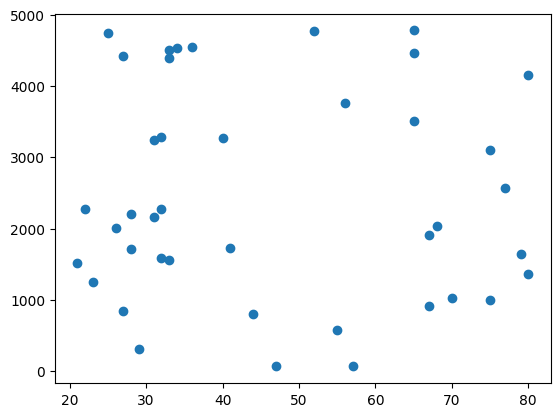

In [242]:
# Únicamente por probar

fig, ax = plt.subplots()
ax.scatter(df_clientes["edad"], df_clientes["puntos_fidelidad"])
plt.show()

<Axes: >

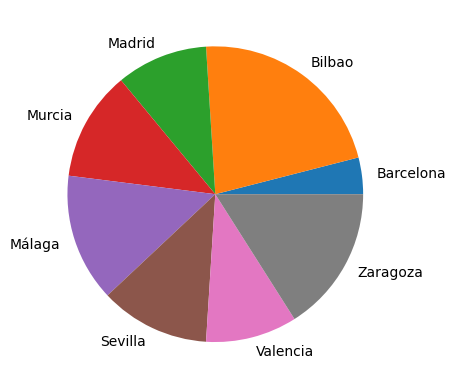

In [243]:
df_clientes.groupby(
    by="ciudad"
).size().plot.pie()

In [244]:
# EJERCICIO 2: CONSULTAS BÁSICAS

# 1. Clientes de Madrid mayores de 30 años

df_clientes[(df_clientes["ciudad"] == "Madrid") & (df_clientes["edad"] > 30)]

,cliente_id,nombre,email,telefono,ciudad,edad,categoria,fecha_registro,puntos_fidelidad
9,10,Francisco Fernández,cliente10@email.com,697-432-963,Madrid,32.0,Premium,2021-10-08,3286.0
27,28,María Martínez,cliente28@email.com,693-653-956,Madrid,80.0,Premium,2021-04-29,1362.0


In [245]:
# 2. Clientes Premium o que tengan más de 3000 puntos de fidelidad

df_clientes[(df_clientes["categoria"] == "Premium") | (df_clientes["puntos_fidelidad"] > 3000)]

,cliente_id,nombre,email,telefono,ciudad,edad,categoria,fecha_registro,puntos_fidelidad
0,1,María García,cliente1@email.com,645-350-328,Valencia,65.0,Premium,2023-10-17,4467.0
3,4,Ana Pérez,cliente4@email.com,699-532-448,Bilbao,27.0,Premium,2021-11-20,837.0
4,5,Carlos Hernández,cliente5@email.com,622-467-967,Zaragoza,56.0,Standard,2020-03-29,3763.0
9,10,Francisco Fernández,cliente10@email.com,697-432-963,Madrid,32.0,Premium,2021-10-08,3286.0
10,11,Elena Rodríguez,cliente11@email.com,637-680-997,Zaragoza,31.0,Básico,2022-10-19,3241.0
11,12,Carmen Sánchez,cliente12@email.com,643-242-352,Bilbao,65.0,Básico,2022-05-27,4780.0
12,13,Paula Ruiz,cliente13@email.com,638-241-621,Murcia,23.0,Premium,2020-08-12,1252.0
15,16,Javier Díaz,cliente16@email.com,630-564-103,Bilbao,80.0,Básico,2020-12-31,4158.0
16,17,María Martín,cliente17@email.com,691-619-723,Sevilla,27.0,Standard,2020-11-26,4418.0
18,19,Luis Fernández,cliente19@email.com,682-180-187,Murcia,70.0,Premium,2022-12-26,1030.0


In [246]:
# 3. Pedidos con total mayor a 500 euros

df_pedidos[df_pedidos["total"] > 500]

,pedido_id,cliente_id,producto,cantidad,precio_unitario,fecha_pedido,estado,descuento,total
0,1,25,Teclado Mecánico,1.0,1420.48,2023-01-01,Pendiente,0.11,1264.23
1,2,<NA>,Cámara Web,3.0,1330.14,2023-03-05,Cancelado,0.15,3391.86
2,3,<NA>,Ratón Inalámbrico,4.0,1397.44,2023-10-11,Pendiente,0.06,5254.37
3,4,<NA>,Altavoz Inteligente,2.0,1234.87,2023-06-04,Enviado,0.16,2074.58
4,5,<NA>,Teclado Mecánico,2.0,865.48,2023-10-24,Cancelado,0.14,1488.63
...,...,...,...,...,...,...,...,...,...
194,195,<NA>,Router WiFi,5.0,566.64,2023-11-16,Completado,0.04,2719.87
195,196,<NA>,Ratón Inalámbrico,3.0,1120.09,2023-07-07,Pendiente,NaN,3158.65
197,198,<NA>,Tablet,5.0,1787.33,2023-03-13,Cancelado,0.28,6434.39
198,199,21,Auriculares Bluetooth,5.0,1481.25,2023-06-03,Cancelado,0.15,6295.31


In [247]:
# 4. Pedidos pendientes del año 2023

# df_pedidos[(df_pedidos["fecha_pedido"].str.startswith("2023")) & (df_pedidos["estado"] == "Pendiente")]

df_pedidos[(df_pedidos["fecha_pedido"].dt.year == 2023) & (df_pedidos["estado"] == "Pendiente")]

,pedido_id,cliente_id,producto,cantidad,precio_unitario,fecha_pedido,estado,descuento,total
0,1,25,Teclado Mecánico,1.0,1420.48,2023-01-01,Pendiente,0.11,1264.23
2,3,<NA>,Ratón Inalámbrico,4.0,1397.44,2023-10-11,Pendiente,0.06,5254.37
6,7,<NA>,Smartphone,2.0,1348.86,2023-04-26,Pendiente,0.04,2589.81
8,9,41,Smartwatch,4.0,993.81,2023-05-05,Pendiente,0.20,3180.19
14,15,6,Tablet,2.0,772.24,2023-03-20,Pendiente,0.02,1513.59
22,23,31,Smartwatch,5.0,113.65,2023-06-29,Pendiente,0.20,454.60
25,26,<NA>,Tablet,5.0,1218.42,2023-02-28,Pendiente,NaN,4325.39
40,41,<NA>,"Monitor 24""",3.0,367.09,2023-01-08,Pendiente,0.08,1013.17
44,45,<NA>,Smartphone,2.0,245.72,2023-08-02,Pendiente,0.23,378.41
49,50,17,Auriculares Bluetooth,1.0,1093.68,2023-11-28,Pendiente,0.27,798.39


In [248]:
# EJERCICIO 3: OPERACIONES DE AGREGACIÓN

# 1. Calcula el número de clientes por ciudad

df_clientes.groupby(by="ciudad").size()

ciudad
Barcelona     2
Bilbao       11
Madrid        5
Murcia        6
Málaga        7
Sevilla       6
Valencia      5
Zaragoza      8
dtype: int64

In [249]:
# 2. Obtén las ventas totales por estado de pedido

df_pedidos.groupby(by="estado").agg(
    ventas_totales=("total","sum")
)

,ventas_totales
estado,
Cancelado,120208.31
Completado,120527.86
Enviado,143136.68
Pendiente,123987.72


In [250]:
# 3. Calcula el promedio de edad de clientes por categoría

df_clientes.groupby("categoria").agg(
    edad_promedio=("edad","mean")
)

,edad_promedio
categoria,
Básico,48.187500
Premium,48.733333
Standard,45.285714


In [251]:
# 4. Obtén el top 3 ciudades con más pedidos

df_combined = pd.merge(
    df_pedidos, df_clientes,
    how="inner", on="cliente_id",
)

df_combined.groupby("ciudad").size().sort_values(ascending=False).head(3)

ciudad
Bilbao      21
Madrid      14
Zaragoza    14
dtype: int64

In [252]:
# EJERCICIO 4: JOINS ENTRE TABLAS

display_cols = ["nombre", "producto", "fecha_pedido", "total"]
# 1. Mostrar nombre del cliente junto con sus pedidos

df_combined = pd.merge(
    df_pedidos, df_clientes,
    how="inner", on="cliente_id"
)
df_combined[display_cols]

,nombre,producto,fecha_pedido,total
0,María López,Teclado Mecánico,2023-01-01,1264.23
1,Alejandro Álvarez,Disco Duro SSD,2023-03-28,5785.89
2,Francisco González,Impresora Láser,2023-02-07,7484.31
3,Ana Jiménez,Smartwatch,2023-05-05,3180.19
4,María García,Router WiFi,2023-12-23,1746.32
...,...,...,...,...
84,Miguel González,Ratón Inalámbrico,2023-05-17,1745.20
85,Raquel González,Teclado Mecánico,2023-08-03,4912.32
86,María García,Auriculares Bluetooth,2023-07-07,3143.64
87,Luis Hernández,Cámara Web,2023-10-11,1947.06


In [253]:
# 2. Mostrar todos los clientes con sus pedidos, deben aparecer también los que no tienen pedidos

df_combined = pd.merge(
    df_pedidos, df_clientes,
    how = "right", on="cliente_id"
)
df_combined[display_cols]

,nombre,producto,fecha_pedido,total
0,María García,Router WiFi,2023-12-23,1746.32
1,María García,Auriculares Bluetooth,2023-07-07,3143.64
2,Carlos Díaz,Teclado Mecánico,2023-05-05,1303.62
3,Francisco González,Impresora Láser,2023-02-07,7484.31
4,Francisco González,Ratón Inalámbrico,2023-02-16,419.74
...,...,...,...,...
92,Francisco Jiménez,Tablet,2023-10-16,2986.46
93,María Díaz,Power Bank,2023-01-04,3489.67
94,María Díaz,Router WiFi,2023-04-13,1538.78
95,María Díaz,Power Bank,2023-07-08,1212.60


In [254]:
# 3. Muestra los pedidos que no tienen cliente asignado

df_pedidos[df_pedidos["cliente_id"].isna()]

,pedido_id,cliente_id,producto,cantidad,precio_unitario,fecha_pedido,estado,descuento,total
1,2,<NA>,Cámara Web,3.0,1330.14,2023-03-05,Cancelado,0.15,3391.86
2,3,<NA>,Ratón Inalámbrico,4.0,1397.44,2023-10-11,Pendiente,0.06,5254.37
3,4,<NA>,Altavoz Inteligente,2.0,1234.87,2023-06-04,Enviado,0.16,2074.58
4,5,<NA>,Teclado Mecánico,2.0,865.48,2023-10-24,Cancelado,0.14,1488.63
6,7,<NA>,Smartphone,2.0,1348.86,2023-04-26,Pendiente,0.04,2589.81
...,...,...,...,...,...,...,...,...,...
194,195,<NA>,Router WiFi,5.0,566.64,2023-11-16,Completado,0.04,2719.87
195,196,<NA>,Ratón Inalámbrico,3.0,1120.09,2023-07-07,Pendiente,NaN,3158.65
196,197,<NA>,Disco Duro SSD,1.0,100.15,2023-03-12,Cancelado,0.24,76.11
197,198,<NA>,Tablet,5.0,1787.33,2023-03-13,Cancelado,0.28,6434.39


In [255]:
# 4. Muestra los clientes que nunca han hecho un pedido

df_combined = pd.merge(
    df_pedidos, df_clientes,
    how="right", on="cliente_id"
)

df_combined[df_combined["pedido_id"].isna()]

df_clientes[~df_clientes["cliente_id"].isin(df_pedidos["cliente_id"])]

,cliente_id,nombre,email,telefono,ciudad,edad,categoria,fecha_registro,puntos_fidelidad
7,8,María Hernández,cliente8@email.com,645-564-750,Zaragoza,28.0,Standard,2021-12-28,1716.0
8,9,Elena Rodríguez,cliente9@email.com,687-750-275,Sevilla,28.0,Standard,2022-02-16,2211.0
13,14,Laura Díaz,cliente14@email.com,686-165-494,Málaga,NaN,Standard,2022-12-19,2059.0
18,19,Luis Fernández,cliente19@email.com,682-180-187,Murcia,70.0,Premium,2022-12-26,1030.0
31,32,Marta Martínez,cliente32@email.com,616-698-588,Valencia,21.0,Básico,2020-06-13,1522.0
39,40,Isabel Álvarez,cliente40@email.com,642-966-152,Barcelona,NaN,Standard,2021-07-20,361.0
44,45,Laura Pérez,cliente45@email.com,662-125-283,Zaragoza,68.0,Standard,2023-10-03,2032.0
46,47,Carmen Ruiz,cliente47@email.com,649-940-914,Sevilla,32.0,Premium,2023-09-13,1582.0


In [256]:
# EJERCICIO 5: LIMPIEZA DE DATOS
# 1. Identificar columnas con valores nulos en ambos DataFrames

print(df_pedidos.isna().sum(axis=0))
print()
print(df_clientes.isna().sum(axis=0))

pedido_id            0
cliente_id         111
producto             0
cantidad             6
precio_unitario      0
fecha_pedido         0
estado               0
descuento            8
total                0
dtype: int64

cliente_id          0
nombre              0
email               0
telefono            3
ciudad              0
edad                5
categoria           0
fecha_registro      0
puntos_fidelidad    4
dtype: int64


In [257]:
# 2. Rellenar las edades nulas con la media de edad de los clientes

df_clientes["edad"] = df_clientes["edad"].fillna(df_clientes["edad"].mean())
df_clientes

,cliente_id,nombre,email,telefono,ciudad,edad,categoria,fecha_registro,puntos_fidelidad
0,1,María García,cliente1@email.com,645-350-328,Valencia,65.000000,Premium,2023-10-17,4467.0
1,2,Carlos Díaz,cliente2@email.com,614-130-195,Sevilla,32.000000,Básico,2023-05-17,NaN
2,3,Francisco González,cliente3@email.com,NaN,Málaga,32.000000,Standard,2023-04-21,2278.0
3,4,Ana Pérez,cliente4@email.com,699-532-448,Bilbao,27.000000,Premium,2021-11-20,837.0
4,5,Carlos Hernández,cliente5@email.com,622-467-967,Zaragoza,56.000000,Standard,2020-03-29,3763.0
5,6,Francisco López,cliente6@email.com,658-180-665,Bilbao,71.000000,Básico,2023-06-20,NaN
6,7,Raquel González,cliente7@email.com,618-146-777,Sevilla,67.000000,Standard,2020-06-12,1907.0
7,8,María Hernández,cliente8@email.com,645-564-750,Zaragoza,28.000000,Standard,2021-12-28,1716.0
8,9,Elena Rodríguez,cliente9@email.com,687-750-275,Sevilla,28.000000,Standard,2022-02-16,2211.0
9,10,Francisco Fernández,cliente10@email.com,697-432-963,Madrid,32.000000,Premium,2021-10-08,3286.0


In [258]:
# 3. Rellenar puntos_fidelidad nulos con 0

df_clientes["puntos_fidelidad"] = df_clientes["puntos_fidelidad"].fillna(0)
df_clientes

,cliente_id,nombre,email,telefono,ciudad,edad,categoria,fecha_registro,puntos_fidelidad
0,1,María García,cliente1@email.com,645-350-328,Valencia,65.000000,Premium,2023-10-17,4467.0
1,2,Carlos Díaz,cliente2@email.com,614-130-195,Sevilla,32.000000,Básico,2023-05-17,0.0
2,3,Francisco González,cliente3@email.com,NaN,Málaga,32.000000,Standard,2023-04-21,2278.0
3,4,Ana Pérez,cliente4@email.com,699-532-448,Bilbao,27.000000,Premium,2021-11-20,837.0
4,5,Carlos Hernández,cliente5@email.com,622-467-967,Zaragoza,56.000000,Standard,2020-03-29,3763.0
5,6,Francisco López,cliente6@email.com,658-180-665,Bilbao,71.000000,Básico,2023-06-20,0.0
6,7,Raquel González,cliente7@email.com,618-146-777,Sevilla,67.000000,Standard,2020-06-12,1907.0
7,8,María Hernández,cliente8@email.com,645-564-750,Zaragoza,28.000000,Standard,2021-12-28,1716.0
8,9,Elena Rodríguez,cliente9@email.com,687-750-275,Sevilla,28.000000,Standard,2022-02-16,2211.0
9,10,Francisco Fernández,cliente10@email.com,697-432-963,Madrid,32.000000,Premium,2021-10-08,3286.0


In [259]:
# 4. Eliminar pedidos donde cantidad es nula

df_pedidos = df_pedidos.dropna(subset="cantidad")
df_pedidos

,pedido_id,cliente_id,producto,cantidad,precio_unitario,fecha_pedido,estado,descuento,total
0,1,25,Teclado Mecánico,1.0,1420.48,2023-01-01,Pendiente,0.11,1264.23
1,2,<NA>,Cámara Web,3.0,1330.14,2023-03-05,Cancelado,0.15,3391.86
2,3,<NA>,Ratón Inalámbrico,4.0,1397.44,2023-10-11,Pendiente,0.06,5254.37
3,4,<NA>,Altavoz Inteligente,2.0,1234.87,2023-06-04,Enviado,0.16,2074.58
4,5,<NA>,Teclado Mecánico,2.0,865.48,2023-10-24,Cancelado,0.14,1488.63
...,...,...,...,...,...,...,...,...,...
195,196,<NA>,Ratón Inalámbrico,3.0,1120.09,2023-07-07,Pendiente,NaN,3158.65
196,197,<NA>,Disco Duro SSD,1.0,100.15,2023-03-12,Cancelado,0.24,76.11
197,198,<NA>,Tablet,5.0,1787.33,2023-03-13,Cancelado,0.28,6434.39
198,199,21,Auriculares Bluetooth,5.0,1481.25,2023-06-03,Cancelado,0.15,6295.31


In [260]:
# EJERCICIO 6: CREACIÓN DE NUEVAS COLUMNAS

def clasificar_edad(edad):
    if edad < 30:
        return "Joven"
    elif 30 <= edad <= 60:
        return "Adulto"
    else:
        return "Senior"

df_clientes["rango_edad"] = df_clientes["edad"].apply(clasificar_edad)

df_clientes

,cliente_id,nombre,email,telefono,ciudad,edad,categoria,fecha_registro,puntos_fidelidad,rango_edad
0,1,María García,cliente1@email.com,645-350-328,Valencia,65.000000,Premium,2023-10-17,4467.0,Senior
1,2,Carlos Díaz,cliente2@email.com,614-130-195,Sevilla,32.000000,Básico,2023-05-17,0.0,Adulto
2,3,Francisco González,cliente3@email.com,NaN,Málaga,32.000000,Standard,2023-04-21,2278.0,Adulto
3,4,Ana Pérez,cliente4@email.com,699-532-448,Bilbao,27.000000,Premium,2021-11-20,837.0,Joven
4,5,Carlos Hernández,cliente5@email.com,622-467-967,Zaragoza,56.000000,Standard,2020-03-29,3763.0,Adulto
5,6,Francisco López,cliente6@email.com,658-180-665,Bilbao,71.000000,Básico,2023-06-20,0.0,Senior
6,7,Raquel González,cliente7@email.com,618-146-777,Sevilla,67.000000,Standard,2020-06-12,1907.0,Senior
7,8,María Hernández,cliente8@email.com,645-564-750,Zaragoza,28.000000,Standard,2021-12-28,1716.0,Joven
8,9,Elena Rodríguez,cliente9@email.com,687-750-275,Sevilla,28.000000,Standard,2022-02-16,2211.0,Joven
9,10,Francisco Fernández,cliente10@email.com,697-432-963,Madrid,32.000000,Premium,2021-10-08,3286.0,Adulto


In [261]:
# 2. Crear columna 'año_mes_pedido' en la que aparezca el año y el mes con el
# formato YYYY-MM a partir de fecha_pedido

df_pedidos["año_mes_pedido"] = df_pedidos["fecha_pedido"].dt.strftime("%Y-%m")

df_pedidos

/tmp/ipykernel_10709/102965573.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pedidos["año_mes_pedido"] = df_pedidos["fecha_pedido"].dt.strftime("%Y-%m")


,pedido_id,cliente_id,producto,cantidad,precio_unitario,fecha_pedido,estado,descuento,total,año_mes_pedido
0,1,25,Teclado Mecánico,1.0,1420.48,2023-01-01,Pendiente,0.11,1264.23,2023-01
1,2,<NA>,Cámara Web,3.0,1330.14,2023-03-05,Cancelado,0.15,3391.86,2023-03
2,3,<NA>,Ratón Inalámbrico,4.0,1397.44,2023-10-11,Pendiente,0.06,5254.37,2023-10
3,4,<NA>,Altavoz Inteligente,2.0,1234.87,2023-06-04,Enviado,0.16,2074.58,2023-06
4,5,<NA>,Teclado Mecánico,2.0,865.48,2023-10-24,Cancelado,0.14,1488.63,2023-10
...,...,...,...,...,...,...,...,...,...,...
195,196,<NA>,Ratón Inalámbrico,3.0,1120.09,2023-07-07,Pendiente,NaN,3158.65,2023-07
196,197,<NA>,Disco Duro SSD,1.0,100.15,2023-03-12,Cancelado,0.24,76.11,2023-03
197,198,<NA>,Tablet,5.0,1787.33,2023-03-13,Cancelado,0.28,6434.39,2023-03
198,199,21,Auriculares Bluetooth,5.0,1481.25,2023-06-03,Cancelado,0.15,6295.31,2023-06


In [262]:
# 3. Añadir columna 'tipo_producto' basada en el nombre del producto

def clasificar_palabra(nombre_producto: str):
    dispositivo = {"laptop", "smartphone", "tablet", "smartwatch"}
    perifericos = {"monitor", "teclado", "ratón", "web"}
    audio = {"auriculares", "altavoz"}
    
    w = nombre_producto.split(" ")[0].lower()

    if w in dispositivo:
        return "Dispositivo"
    elif w in perifericos:
        return "Perifericos"
    elif w in audio:
        return "Audio"
    else:
        return "Otros"
        

df_pedidos["tipo_producto"] = df_pedidos["producto"].apply(clasificar_palabra)
df_pedidos


/tmp/ipykernel_10709/1963815006.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pedidos["tipo_producto"] = df_pedidos["producto"].apply(clasificar_palabra)


,pedido_id,cliente_id,producto,cantidad,precio_unitario,fecha_pedido,estado,descuento,total,año_mes_pedido,tipo_producto
0,1,25,Teclado Mecánico,1.0,1420.48,2023-01-01,Pendiente,0.11,1264.23,2023-01,Perifericos
1,2,<NA>,Cámara Web,3.0,1330.14,2023-03-05,Cancelado,0.15,3391.86,2023-03,Otros
2,3,<NA>,Ratón Inalámbrico,4.0,1397.44,2023-10-11,Pendiente,0.06,5254.37,2023-10,Perifericos
3,4,<NA>,Altavoz Inteligente,2.0,1234.87,2023-06-04,Enviado,0.16,2074.58,2023-06,Audio
4,5,<NA>,Teclado Mecánico,2.0,865.48,2023-10-24,Cancelado,0.14,1488.63,2023-10,Perifericos
...,...,...,...,...,...,...,...,...,...,...,...
195,196,<NA>,Ratón Inalámbrico,3.0,1120.09,2023-07-07,Pendiente,NaN,3158.65,2023-07,Perifericos
196,197,<NA>,Disco Duro SSD,1.0,100.15,2023-03-12,Cancelado,0.24,76.11,2023-03,Otros
197,198,<NA>,Tablet,5.0,1787.33,2023-03-13,Cancelado,0.28,6434.39,2023-03,Dispositivo
198,199,21,Auriculares Bluetooth,5.0,1481.25,2023-06-03,Cancelado,0.15,6295.31,2023-06,Audio


In [263]:
# 4. Crear columna 'cliente_activo' (sí/no basado en si tiene pedidos)

def clasificar_cliente(cliente_id: int):
    n_pedidos = df_pedidos[df_pedidos["cliente_id"] == cliente_id].shape[0]
    
    return "sí" if n_pedidos > 0 else "no"

df_clientes["cliente_activo"] = df_clientes["cliente_id"].apply(clasificar_cliente)
df_clientes

,cliente_id,nombre,email,telefono,ciudad,edad,categoria,fecha_registro,puntos_fidelidad,rango_edad,cliente_activo
0,1,María García,cliente1@email.com,645-350-328,Valencia,65.000000,Premium,2023-10-17,4467.0,Senior,sí
1,2,Carlos Díaz,cliente2@email.com,614-130-195,Sevilla,32.000000,Básico,2023-05-17,0.0,Adulto,sí
2,3,Francisco González,cliente3@email.com,NaN,Málaga,32.000000,Standard,2023-04-21,2278.0,Adulto,sí
3,4,Ana Pérez,cliente4@email.com,699-532-448,Bilbao,27.000000,Premium,2021-11-20,837.0,Joven,sí
4,5,Carlos Hernández,cliente5@email.com,622-467-967,Zaragoza,56.000000,Standard,2020-03-29,3763.0,Adulto,sí
5,6,Francisco López,cliente6@email.com,658-180-665,Bilbao,71.000000,Básico,2023-06-20,0.0,Senior,sí
6,7,Raquel González,cliente7@email.com,618-146-777,Sevilla,67.000000,Standard,2020-06-12,1907.0,Senior,sí
7,8,María Hernández,cliente8@email.com,645-564-750,Zaragoza,28.000000,Standard,2021-12-28,1716.0,Joven,no
8,9,Elena Rodríguez,cliente9@email.com,687-750-275,Sevilla,28.000000,Standard,2022-02-16,2211.0,Joven,no
9,10,Francisco Fernández,cliente10@email.com,697-432-963,Madrid,32.000000,Premium,2021-10-08,3286.0,Adulto,sí


In [264]:
# EJERCICIO 7: CONSULTAS COMPLEJAS
# 1. Obtén los clientes de Barcelona que han hecho pedidos > 1000€

df_combined = pd.merge(
    df_pedidos, df_clientes, 
    on="cliente_id"
)

df_combined[(df_combined["ciudad"] == "Barcelona") & (df_combined["total"] > 1000)]

#df_combined.query("ciudad == 'Barcelona' and total > 1000")

,pedido_id,cliente_id,producto,cantidad,precio_unitario,fecha_pedido,estado,descuento,total,año_mes_pedido,...,nombre,email,telefono,ciudad,edad,categoria,fecha_registro,puntos_fidelidad,rango_edad,cliente_activo
57,124,26,Auriculares Bluetooth,3.0,1494.15,2023-04-24,Cancelado,0.23,3451.49,2023-04,...,Luis Hernández,cliente26@email.com,653-919-982,Barcelona,33.0,Premium,2021-01-24,4393.0,Adulto,sí
85,194,26,Cámara Web,5.0,397.36,2023-10-11,Cancelado,0.02,1947.06,2023-10,...,Luis Hernández,cliente26@email.com,653-919-982,Barcelona,33.0,Premium,2021-01-24,4393.0,Adulto,sí


In [265]:
# 2. Muestra los productos más vendidos por ciudad

ventas_por_ciudad = df_combined.groupby(["ciudad", "producto"])["cantidad"].sum().reset_index()

ventas_ordenadas = ventas_por_ciudad.sort_values(by=["ciudad", "cantidad"], ascending=[True, False])

top_productos_ciudad = ventas_ordenadas.groupby("ciudad").head(1)

top_productos_ciudad

,ciudad,producto,cantidad
1,Barcelona,Cámara Web,5.0
7,Bilbao,Impresora Láser,9.0
26,Madrid,Teclado Mecánico,9.0
30,Murcia,Impresora Láser,9.0
36,Málaga,Disco Duro SSD,14.0
46,Sevilla,Teclado Mecánico,11.0
47,Valencia,Auriculares Bluetooth,6.0
57,Zaragoza,Cámara Web,8.0


In [266]:
# 3. Obtén los clientes Premium con mayor gasto total

top_clientes = df_combined[df_combined["categoria"] == "Premium"] \
    .groupby("cliente_id")["total"].sum().sort_values(ascending=False)

#id_clientes_premium = df_clientes[df_clientes["categoria"] == "Premium"]["cliente_id"]

#top_clientes[top_clientes.index.isin(id_clientes_premium)]

top_clientes

cliente_id
10    17521.96
42     7880.04
20     6859.12
22     6391.17
26     6337.67
29     5905.89
38     5574.87
28     5280.30
1      4889.96
4      2384.06
27     1570.38
13      323.43
43      193.31
Name: total, dtype: float64

In [277]:
# 4. Muestra la evolución mensual de ventas en 2023

pedidos_2023 = df_pedidos[df_pedidos["fecha_pedido"].dt.year == 2023]

pedidos_2023.groupby(pedidos_2023["fecha_pedido"].dt.month)["total"].sum()

fecha_pedido
1     56046.03
2     51102.82
3     50170.34
4     28466.08
5     20641.25
6     43933.92
7     48425.84
8     31299.51
9     25569.24
10    46764.39
11    27734.90
12    56633.47
Name: total, dtype: float64

In [282]:
# 5. Obtén la media de total de ventas y cuenta los pedidos por clientes

df_combined.groupby("cliente_id").agg(
    gasto_medio=("total", "mean"),
    pedidos=("pedido_id", "count")
)

,gasto_medio,pedidos
cliente_id,,
1,2444.980000,2
2,1303.620000,1
3,3952.025000,2
4,2384.060000,1
5,2118.293333,3
6,1513.590000,1
7,4705.240000,3
10,3504.392000,5
11,4681.770000,1


In [297]:
# 6. Muestre los dos productos con mejor desempeño por categoría de cliente, un
# producto tiene mejor desempeño que otro si tanto la suma total de ventas como la
# cantidad de ventas son mayores

top_productos_por_categoria = df_combined.groupby(["categoria", "producto"])[["total", "cantidad"]].sum().reset_index()


top_desempeno = top_productos_por_categoria.sort_values(by=["categoria", "total"], ascending=[True, False])

top_desempeno.groupby("categoria").head(2)

,categoria,producto,total,cantidad
3,Básico,Impresora Láser,12992.86,15.0
1,Básico,Auriculares Bluetooth,10442.77,9.0
23,Premium,Tablet,13773.76,13.0
15,Premium,Disco Duro SSD,13330.77,17.0
35,Standard,Teclado Mecánico,21575.25,26.0
28,Standard,Impresora Láser,15463.18,15.0
